# Univariate Regression: Housing Prediction

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
import sklearn
from sklearn import*
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
def load_data(path):
    data = np.loadtxt(path, delimiter=',')
    X = data[:,0]
    y = data[:,1]
    return X,y

In [4]:
X_train,y_train = load_data("linear_regression/ex1data1.txt")

In [5]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]
Type of X_train: <class 'numpy.ndarray'>


In [6]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]
Type of y_train: <class 'numpy.ndarray'>


## Using Scikit Learn To Test Linear Regression

In [7]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [8]:
# Train the model using the training sets
#regr.fit(X_train, y_train)

In [9]:
# Make predictions using the testing set
#diabetes_y_pred = regr.predict(X_train)

## Visualization Using Scikit Learning

In [10]:
# The mean squared error
#print("Mean squared error: %.2f" % mean_squared_error(X_train, y_train))
# The coefficient of determination: 1 is perfect prediction
#print("Coefficient of determination: %.2f" % r2_score(X_train, y_train))

# Plot outputs
#plt.scatter(X_train, y_train,marker='x', color="red")
#plt.plot(X_train, y_train, color="blue", linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

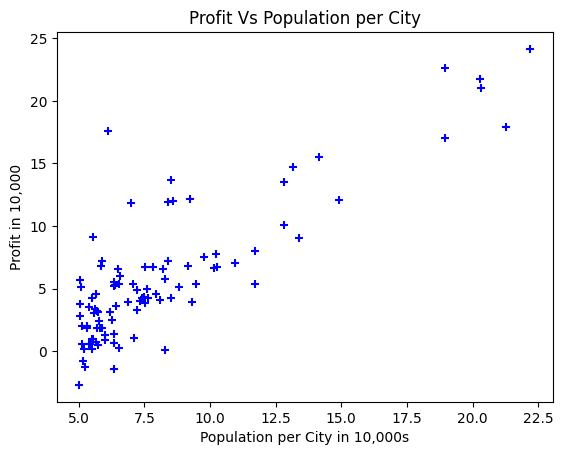

In [11]:
plt.scatter(X_train,y_train, marker='+', c='b')
plt.title("Profit Vs Population per City")
plt.ylabel("Profit in 10,000")
plt.xlabel("Population per City in 10,000s")
plt.show()

In [12]:
def predict(X,w,b):
    
    m = X.shape[0]
    f_wb = np.zeros(m)
    #m = len(X)
    for i in range(m):
        f_wb =w*X[i] + b
        #f_wb = np.dot(X[i],w)+b
    return  f_wb

In [13]:
inital_w=2
inital_b=4

uniRegression = predict(X_train,inital_w,inital_b)
print(type(uniRegression))
print(f'prediction model at initial w,b: {uniRegression:.3f}')

<class 'numpy.float64'>
prediction model at initial w,b: 14.874


In [14]:
def compute_Cost(X,y,w,b):
    
    # number of training examples
    m = X.shape[0] 
    m = len(X)
    cost_sum=0
    #f_wb_x=0
    
    #f_wb_x=linear_model(X,w,b)
    for i in range(m):
        
        f_wb_x =X[i]*w + b
        cost = (f_wb_x - y[i])**2
        cost_sum +=  cost
    total_cost =cost_sum/(2*m)
    return total_cost

In [15]:
cost = compute_Cost(X_train,y_train, 2,1)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w: 75.203


In [16]:
def computeGradient(X,y,w,b):
    
    dw=0
    db=0
    #f_wb = linear_model(w,b)
    for i in range(len(X_train)):
        
        f_wb = X[i]*w + b
        dw_i = (f_wb - y[i])*X[i]
        db_i = f_wb - y[i] 
        dw += dw_i
        db += db_i
        
    dw = dw/len(X_train)
    db = db/len(X_train)
        
    return dw,db

In [17]:
gradw,gradb = computeGradient(X_train,y_train,0,0)

In [18]:
 print(f'Initial dw= {gradw} and Initial db= {gradb}')

Initial dw= -65.32884974555672 and Initial db= -5.83913505154639


In [19]:
def computeGradientDescent(X,y,w_in,b_in,costFunction,gradientFunction,alpha,num_iteration):
    
    
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b= b_in
    dj_dw = 0
    dj_db = 0 
    
    for i in range(num_iteration):
        
        gradw,gradb = gradientFunction(X,y,w,b)
        
        w = w - alpha * gradw
        b = b - alpha * gradb
        
        if i < 100000:
            cost = costFunction(X,y,w,b)
            J_history.append(cost)
            
        if i%math.ceil(num_iteration/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history

In [20]:
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = computeGradientDescent(X_train ,y_train, initial_w, initial_b, 
                     compute_Cost, computeGradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


In [21]:
m = X_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X_train[i] + b
    #print(f"prediction: { predicted[i]:0.2f}, target value: {y_train[i]}")
    #print(f"prediction: {np.dot(X_train[i], w) + b:0.2f}, target value: {y_train[i]}")
print(f"value of w:{w}, value of b:{b}")

value of w:1.166362350335582, value of b:-3.63029143940436


Text(0.5, 0, 'Population of City in 10,000s')

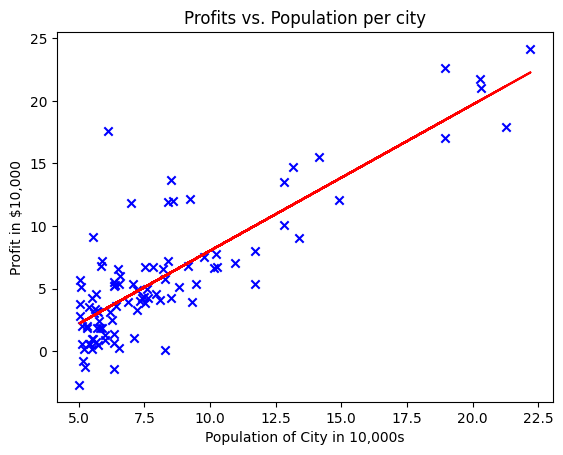

In [22]:
# Create a scatter plot of the data. 
plt.scatter(X_train, y_train, marker='x', c='b') 

# Plot the linear fit
plt.plot(X_train, predicted, c = "r")

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

In [23]:
p = predict(X_train, w, b)
accuracy =(np.mean(p - y_train <=0.9)* 100)
print(f'Train Accuracy: {accuracy:.2f}' +'%')

Train Accuracy: 79.38%


## Test the Model with new data 

In [24]:
prediction = 4.4*w + b
print('For population = 44,0000, we predict a profit of $%.2f' % (prediction*10000))

For population = 44,0000, we predict a profit of $15017.03


<a name="2.7"></a>
### Congratulations! ADUSEI ASARE
You build your first linear regression app(House Pricing prediction) with single input(x-size, of plot)